# Loading the dataset for NeurIPS, ICLR, ICML conferences (2006 - 2024)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

path_papers ="/kaggle/input/all-papers/papers.csv"
df_papers = pd.read_csv(path_papers)

print(f"We have {len(df_papers)} rows, each of which contains the following {df_papers.shape[1]} details: \n")
for col in df_papers.columns:
    print(col)
print()
df_papers.head(5)

We have 172164 rows, each of which contains the following 5 details: 

Conference
Year
Title
Author
Affiliation



,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Yingxue Wang,"Swiss Federal Institute of Technology, Zurich"
1,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Rodney J Douglas,Institute of Neuroinformatics
2,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Shih-Chii Liu,"Institute for Neuroinformatics, University of ..."
3,NeurIPS,2006,Multi-Task Feature Learning,Andreas Argyriou,Ecole Centrale de Paris
4,NeurIPS,2006,Multi-Task Feature Learning,Theos Evgeniou,INSEAD


# Quantifying Missing Data

In [32]:
conferences = df_papers['Conference'].value_counts()
nan_counts = df_papers.isna().sum()

print(nan_counts, '\n')
print(f"Total rows are {len(df_papers)}")

Conference        0
Year              0
Title             0
Author            5
Affiliation    3999
dtype: int64 

Total rows are 172164


##### As we can see, the number rows with NaN in each column is really low relative to the total number of rows. Thus, we need not worry about error in our data that might arise because we do not have the entire data.

In [29]:
top_5_authors = df_papers['Author'].value_counts().head(5)

# Get the top 5 most frequently mentioned affiliations
top_5_affiliations = df_papers['Affiliation'].value_counts().head(5)

# Print the top 5 authors and affiliations
print("Top 5 Most Frequently Mentioned Authors:")
print(top_5_authors)

print("\nTop 5 Most Frequently Mentioned Affiliations:")
print(top_5_affiliations)

Top 5 Most Frequently Mentioned Authors:
Author
Sergey Levine     209
Yoshua Bengio     169
Stefano Ermon     147
Michael Jordan    140
Pieter Abbeel     139
Name: count, dtype: int64

Top 5 Most Frequently Mentioned Affiliations:
Affiliation
Stanford University           3661
Google                        3403
Carnegie Mellon University    2992
Tsinghua University           2384
DeepMind                      2348
Name: count, dtype: int64


# Number of Papers per Year and per Conference

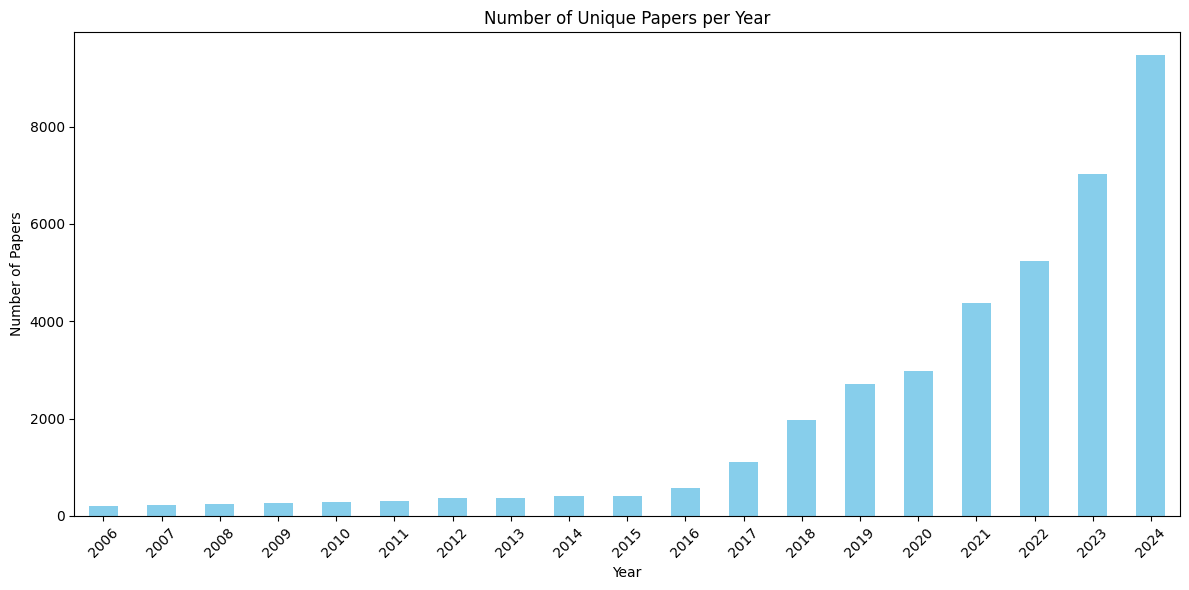

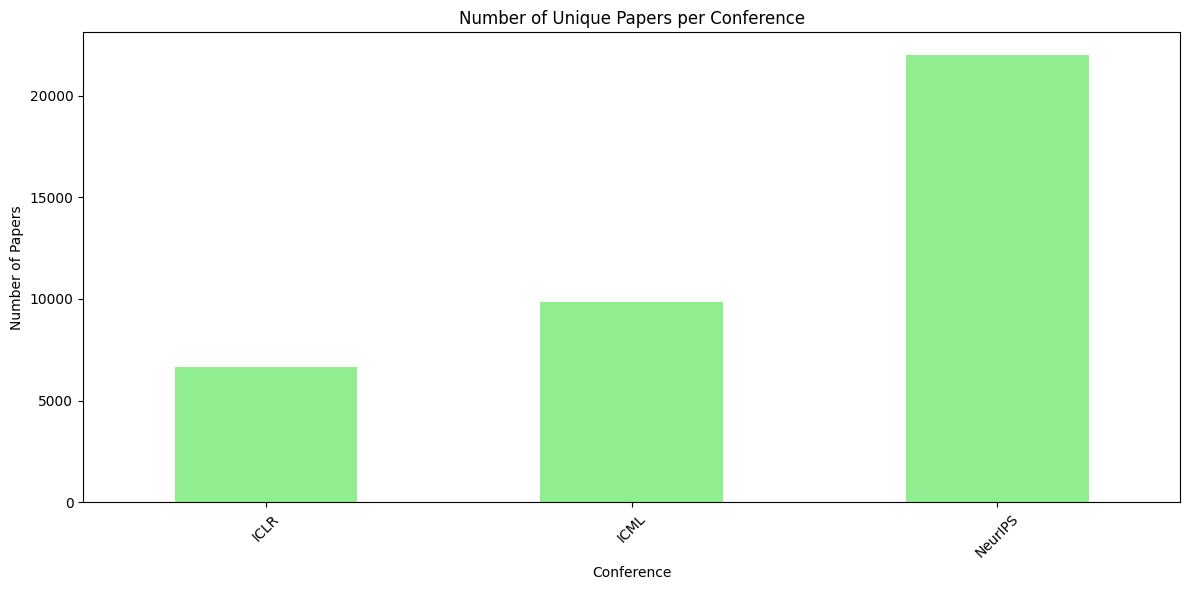

<Figure size 1200x600 with 0 Axes>

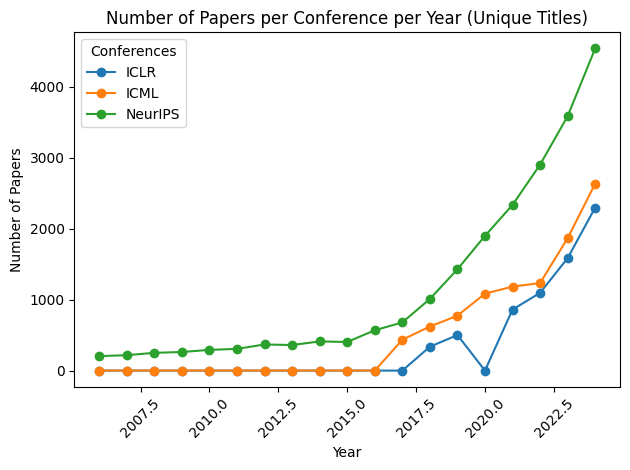

In [13]:
df_clean = df_papers.dropna(subset=['Year', 'Title'])

# Count the number of unique papers per year based on the 'Title'
papers_per_year = df_clean.groupby('Year')['Title'].nunique()

# Count the number of unique papers per conference based on the 'Title'
papers_per_conference = df_clean.groupby('Conference')['Title'].nunique()

# Count the number of unique papers per conference per year based on the 'Title'
papers_per_conference_year = df_clean.groupby(['Year', 'Conference'])['Title'].nunique().unstack(fill_value=0)

# Plotting Number of Papers per Year (Unique Titles)
plt.figure(figsize=(12, 6))
papers_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Papers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting Number of Papers per Conference (Unique Titles)
plt.figure(figsize=(12, 6))
papers_per_conference.plot(kind='bar', color='lightgreen')
plt.title('Number of Unique Papers per Conference')
plt.xlabel('Conference')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting Number of Papers per Conference per Year (Unique Titles)
plt.figure(figsize=(12, 6))
papers_per_conference_year.plot(kind='line', marker='o')
plt.title('Number of Papers per Conference per Year (Unique Titles)')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.legend(title='Conferences')
plt.tight_layout()

# Show the plots
plt.show()

# Most Frequent Authors and Papers

Top 3 Authors by Number of Publications:
Author
Sergey Levine    209
Yoshua Bengio    169
Stefano Ermon    147
Name: Title, dtype: int64

Top 3 Affiliations by Number of Publications:
Affiliation
Stanford University           1838
Google                        1832
Carnegie Mellon University    1755
Name: Title, dtype: int64


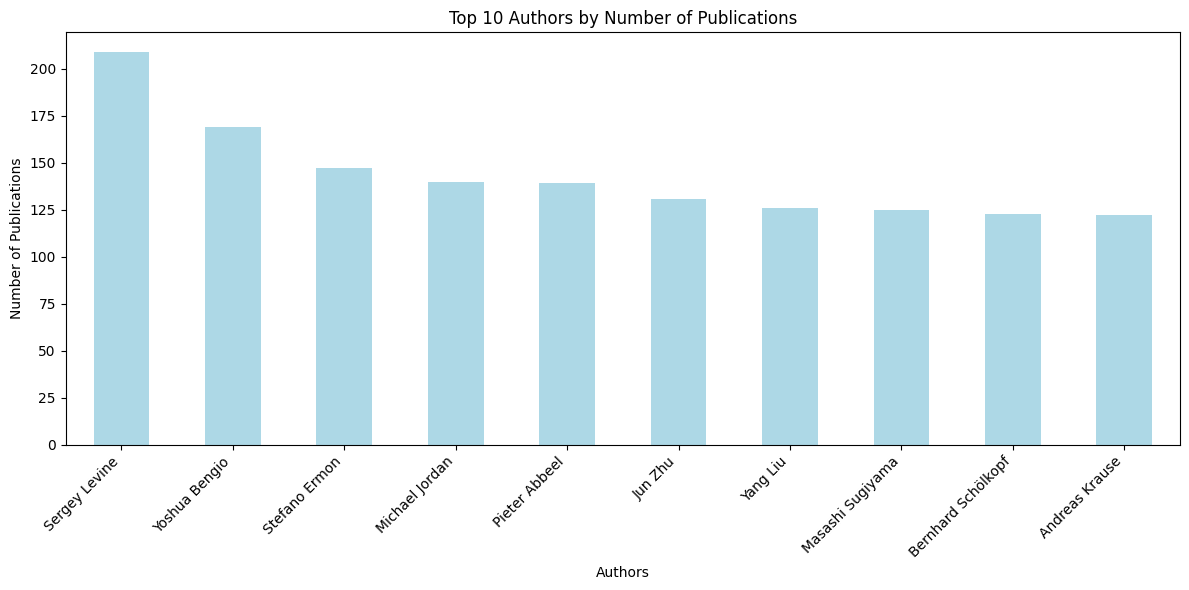

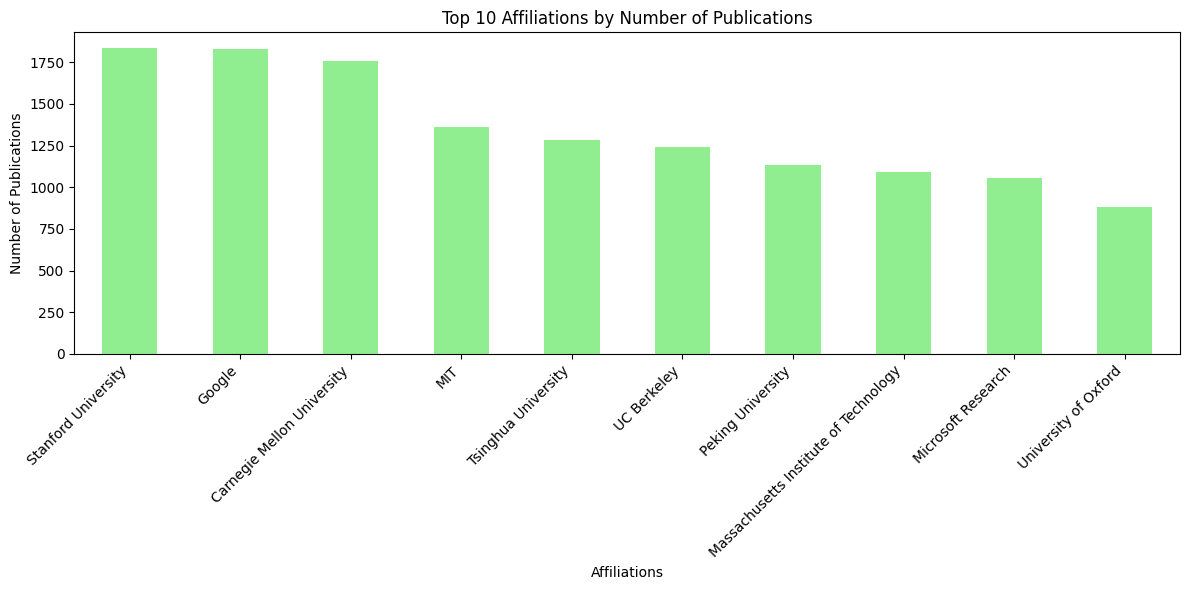

In [20]:
df_clean = df_papers.dropna(subset=['Year', 'Title'])

affiliation_counts = df_clean.drop_duplicates(subset=['Affiliation', 'Title']).groupby('Affiliation')['Title'].count()

author_counts = df_clean.drop_duplicates(subset=['Author', 'Title']).groupby('Author')['Title'].count()

author_counts_sorted = author_counts.sort_values(ascending=False)
affiliation_counts_sorted = affiliation_counts.sort_values(ascending=False)

print("Top 3 Authors by Number of Publications:")
print(author_counts_sorted.head(3))

print("\nTop 3 Affiliations by Number of Publications:")
print(affiliation_counts_sorted.head(3))

plt.figure(figsize=(12, 6))
author_counts_sorted.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Authors by Number of Publications')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plotting Top 10 Affiliations by Number of Publications
plt.figure(figsize=(12, 6))
affiliation_counts_sorted.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Affiliations by Number of Publications')
plt.xlabel('Affiliations')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plots
plt.show()

# Trend of Leading Authors and Institutes every year

In [53]:
df_clean = df_papers.dropna(subset=['Title', 'Author', 'Affiliation'])

# Count the number of papers per year per author
author_paper_counts = df_clean.groupby(['Year', 'Author'])['Title'].nunique().reset_index(name='Paper_Count')

# Find the author with the maximum number of papers for each year
max_author_papers = author_paper_counts.loc[author_paper_counts.groupby('Year')['Paper_Count'].idxmax()]

# Count the number of papers per year per affiliation
affiliation_paper_counts = df_clean.groupby(['Year', 'Affiliation'])['Title'].nunique().reset_index(name='Paper_Count')

# Find the affiliation with the maximum number of papers for each year
max_affiliation_papers = affiliation_paper_counts.loc[affiliation_paper_counts.groupby('Year')['Paper_Count'].idxmax()]

print("Max papers per author per year:\n")
print(max_author_papers[['Year', 'Author', 'Paper_Count']])

print("\nMax papers per affiliation per year:\n")
print(max_affiliation_papers[['Year', 'Affiliation', 'Paper_Count']])

Max papers per author per year:

        Year              Author  Paper_Count
35      2006  Bernhard Schölkopf            7
407     2007          Alex Smola            5
1225    2008      Michael Jordan            7
1891    2009            Rong Jin            5
2454    2010      Michael Jordan            5
2779    2011        Ambuj Tewari            5
3777    2012             Han Liu            5
4904    2013      Michael Jordan            6
5968    2014   Pradeep Ravikumar            9
7025    2015   Pradeep Ravikumar            7
8404    2016       Pieter Abbeel            7
10391   2017      Lawrence Carin           13
15508   2018       Sergey Levine           21
22103   2019       Sergey Levine           33
28203   2020    Masashi Sugiyama           18
40257   2021       Sergey Levine           42
53719   2022       Sergey Levine           33
73580   2023       Tongliang Liu           29
102032  2024            Yang Liu           54

Max papers per affiliation per year:

       Y

# Number of Authors per Paper

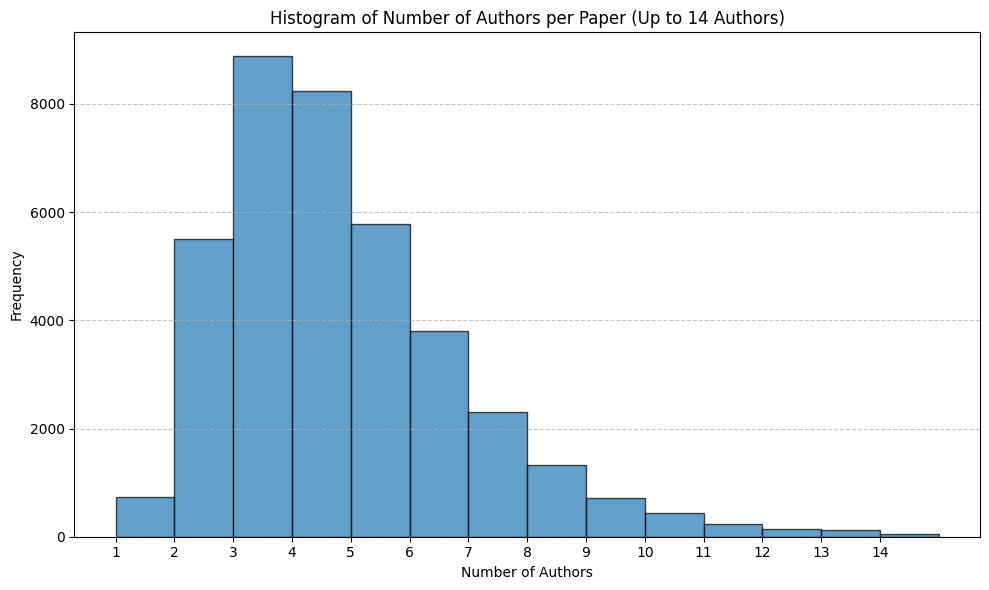

Maximum number of authors on a single paper: 76
Paper with the maximum number of authors:
CVQA: Culturally-diverse Multilingual Visual Question Answering Benchmark

Median number of authors per paper: 4.00


In [41]:
df_clean = df_papers.dropna(subset=['Title', 'Author'])

# Group by 'Title' and count the unique authors per paper
authors_per_paper = df_clean.groupby('Title')['Author'].nunique()

# Filter to only include papers with less than 15 authors
authors_per_paper_filtered = authors_per_paper[authors_per_paper < 15]

# Plotting the histogram for the number of authors per paper (up to 14 authors)
plt.figure(figsize=(10, 6))
plt.hist(authors_per_paper_filtered, bins=range(1, authors_per_paper_filtered.max() + 2), edgecolor='black', alpha=0.7)
plt.title('Histogram of Number of Authors per Paper (Up to 14 Authors)')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.xticks(range(1, authors_per_paper_filtered.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Find the maximum number of authors on a single paper
max_authors = authors_per_paper.max()
max_authors_paper = authors_per_paper[authors_per_paper == max_authors]

# Find the average number of authors per paper
avg_authors = authors_per_paper.median()

# Print the maximum number of authors, the corresponding paper titles, and the average number of authors
print(f"Maximum number of authors on a single paper: {max_authors}")
print("Paper with the maximum number of authors:")
print(max_authors_paper.index.tolist()[0])

print(f"\nMedian number of authors per paper: {avg_authors:.2f}")

# Median number of Authors per Paper per Year

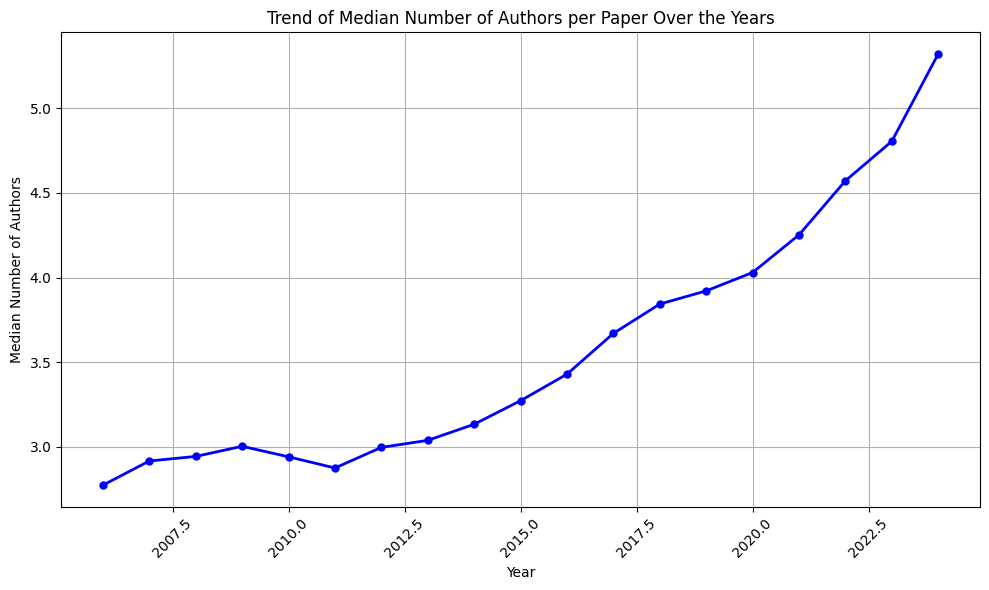

In [46]:
df_clean = df_papers.dropna(subset=['Title', 'Author'])

# Group by 'Title' and count the unique authors per paper
authors_per_paper = df_clean.groupby('Title')['Author'].nunique()

# Add the year column to authors_per_paper
authors_per_paper_with_year = df_clean.groupby('Title').agg({'Year': 'first', 'Author': 'nunique'})

# Calculate the median number of authors for each year
mean_authors_per_year = authors_per_paper_with_year.groupby('Year')['Author'].mean()

# Plotting the trend of median number of authors over the years
plt.figure(figsize=(10, 6))
mean_authors_per_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Trend of Median Number of Authors per Paper Over the Years')
plt.xlabel('Year')
plt.ylabel('Median Number of Authors')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### More number of co-authors shows that the collaboration within the field has been increasing and might also be hinting that the field might have much harder problems to solve which is increasing the mean number of authors per paper

##### Now lets check the same trend for affiations

# Median number of Affiations per Paper per Year

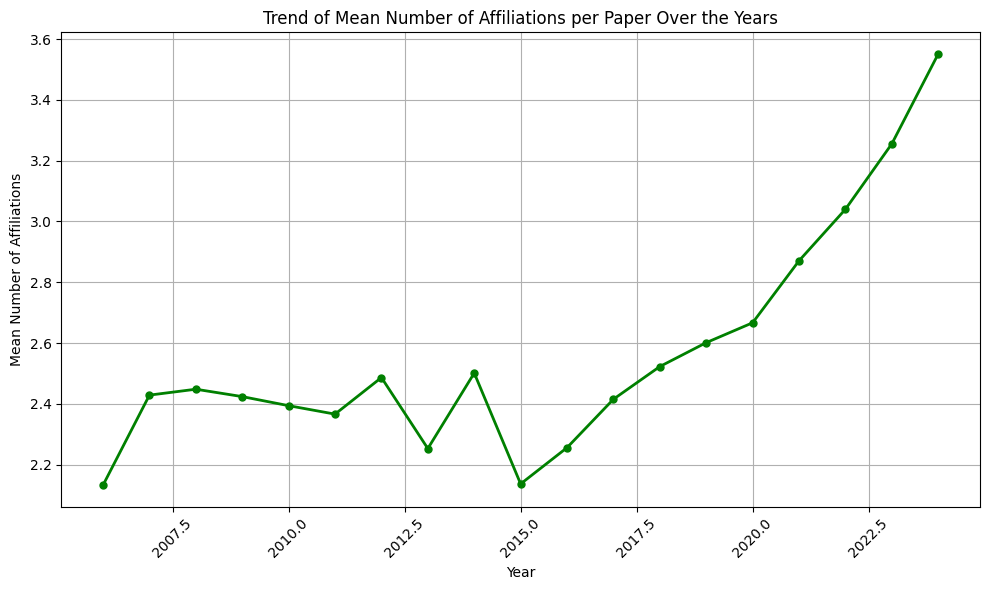

In [47]:
df_clean = df_papers.dropna(subset=['Title', 'Affiliation'])

# Group by 'Title' and count the unique affiliations per paper
affiliations_per_paper = df_clean.groupby('Title')['Affiliation'].nunique()

# Add the year column to affiliations_per_paper
affiliations_per_paper_with_year = df_clean.groupby('Title').agg({'Year': 'first', 'Affiliation': 'nunique'})

# Calculate the mean number of affiliations for each year
mean_affiliations_per_year = affiliations_per_paper_with_year.groupby('Year')['Affiliation'].mean()

# Plotting the trend of mean number of affiliations over the years
plt.figure(figsize=(10, 6))
mean_affiliations_per_year.plot(kind='line', marker='o', color='g', linestyle='-', linewidth=2, markersize=5)
plt.title('Trend of Mean Number of Affiliations per Paper Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Number of Affiliations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Increasing affiliation in papers gives us signs of broader collaboration among institutes as well

# Loading the NeurIPS Dataset (1987 - 2024)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
path_autors ="/kaggle/input/nips-papers-1987-2019-updated/authors.csv"
path_papers = "/kaggle/input/nips-papers-1987-2019-updated/papers.csv"
authors = pd.read_csv(path_autors)
papers = pd.read_csv(path_papers)

# Merge datasets on 'source_id'
merged_df = pd.merge(authors, papers, on='source_id', how='outer')

In [4]:
authors.head(5)

,source_id,first_name,last_name,institution
0,27,Alan,Murray,NaN
1,27,Anthony,Smith,NaN
2,27,Zoe,Butler,NaN
3,63,Yaser,Abu-Mostafa,NaN
4,60,Michael,Fleisher,NaN


In [19]:
papers.head(5)

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


In [16]:
merged_df.head()

,source_id,first_name,last_name,institution,year,title,abstract,full_text
0,1,Hisashi,Suzuki,NaN,1987,Self-Organization of Associative Database and ...,NaN,767 \n\nSELF-ORGANIZATION OF ASSOCIATIVE DATA...
1,1,Suguru,Arimoto,NaN,1987,Self-Organization of Associative Database and ...,NaN,767 \n\nSELF-ORGANIZATION OF ASSOCIATIVE DATA...
2,2,Philip,Chou,NaN,1987,The Capacity of the Kanerva Associative Memory...,NaN,184 \n\nTHE CAPACITY OF THE KANERVA ASSOC...
3,2,Philip,Chou,NaN,2014,Kernel Mean Estimation via Spectral Filtering,The problem of estimating the kernel mean in a...,Kernel Mean Estimation via Spectral Filtering\...
4,2,Philip,Chou,NaN,2015,Double or Nothing: Multiplicative Incentive Me...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\n\nIncentive...


# Handling Null Values in both datasets as well as the merged dataset

In [6]:
print(f"Authors dataset contains {authors.shape[0]} rows and {authors.shape[1]} columns. \n")
authors.info()

Authors dataset contains 30237 rows and 8 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30237 entries, 0 to 30236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_id    30237 non-null  int64 
 1   first_name   30236 non-null  object
 2   last_name    30234 non-null  object
 3   institution  17302 non-null  object
dtypes: int64(1), object(3)
memory usage: 945.0+ KB


In [8]:
print(f"Papers dataset contains {papers.shape[0]} rows and {papers.shape[1]} columns. \n")
papers.info()

Papers dataset contains 9680 rows and 5 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source_id  9680 non-null   int64 
 1   year       9680 non-null   int64 
 2   title      9680 non-null   object
 3   abstract   6361 non-null   object
 4   full_text  9677 non-null   object
dtypes: int64(2), object(3)
memory usage: 378.2+ KB


In [10]:
print(f"Merged dataset contains {merged_df.shape[0]} rows and {merged_df.shape[1]} columns. \n")
df.info()

Merged dataset contains 90001 rows and 8 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90001 entries, 0 to 90000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_id    90001 non-null  int64 
 1   first_name   89996 non-null  object
 2   last_name    89997 non-null  object
 3   institution  49324 non-null  object
 4   year         90001 non-null  int64 
 5   title        90001 non-null  object
 6   abstract     64048 non-null  object
 7   full_text    89989 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.5+ MB


#### As we can see, abstract and institution column have a lot of NaN values. Thus, we need to make sure that it does not lead to miscalculations and under/over estimation of certain quantities.

# Research Papers Per Year

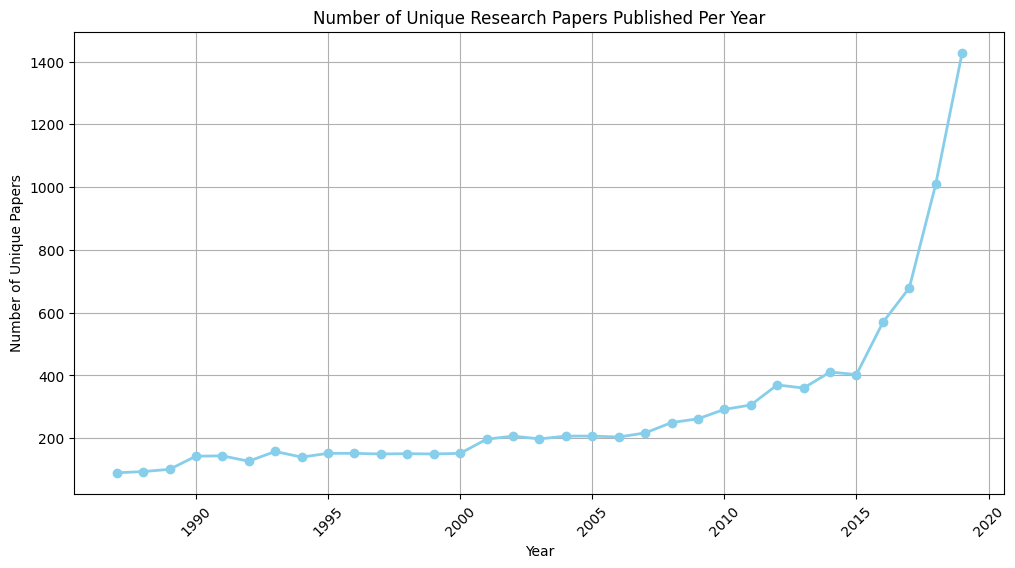

In [23]:
papers_per_year = merged_df.groupby('year')['source_id'].nunique()

# Plot the number of unique research papers published per year
plt.figure(figsize=(12, 6))
papers_per_year.plot(kind='line', marker='o', color='skyblue', lw=2)
plt.title('Number of Research Papers Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Papers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Leading Authors and Institutions

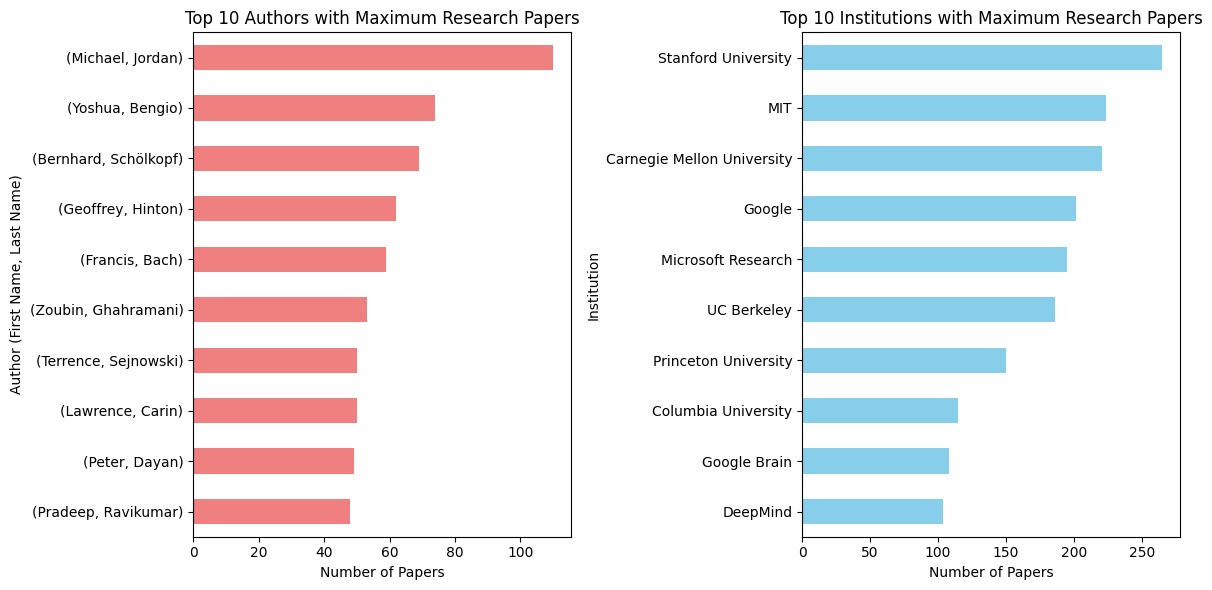

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

author_paper_count = merged_df.groupby(['first_name', 'last_name'])['source_id'].nunique()

# Get the top 10 authors with the maximum number of unique papers
top_authors = author_paper_count.sort_values(ascending=False).head(10)

institution_paper_count = merged_df.groupby('source_id')['institution'].unique().explode()

# Count how many papers are associated with each institution
institution_counts = institution_paper_count.value_counts()

# Get the top 10 institutions with the maximum number of unique papers
top_institutions = institution_counts.head(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_authors.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Authors with Maximum Research Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Author (First Name, Last Name)')
plt.gca().invert_yaxis()  

# Plotting the Top 10 Institutions
plt.subplot(1, 2, 2)
top_institutions.plot(kind='barh', color='skyblue')
plt.title('Top 10 Institutions with Maximum Research Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Institution')
plt.gca().invert_yaxis()  

# Display both plots
plt.tight_layout()
plt.show()


# Number of Authors per Paper

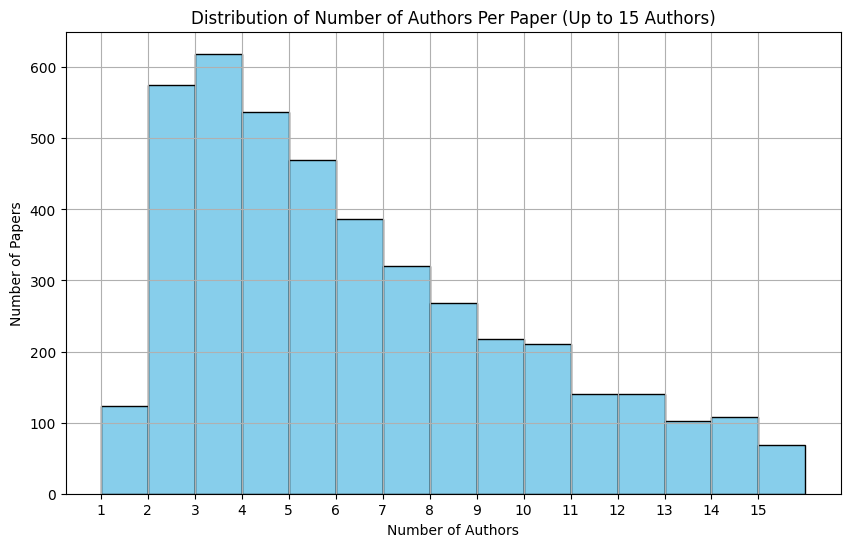

The median number of authors per paper is: 5.0


In [29]:
authors_per_paper = merged_df.groupby('source_id')[['first_name', 'last_name']].nunique()

# Count the number of authors for each paper
authors_count = authors_per_paper['first_name']

# Filter the authors_count to include only papers with 1 to 15 authors
authors_count_filtered = authors_count[authors_count <= 15]

# Calculate the median number of authors per paper
median_authors = authors_count_filtered.median()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(authors_count_filtered, bins=range(1, 17), color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Authors Per Paper (Up to 15 Authors)')
plt.xlabel('Number of Authors')
plt.ylabel('Number of Papers')
plt.grid(True)
plt.xticks(range(1, 16))  # Ensure the x-axis includes all possible number of authors (1 to 15)
plt.show()

# Print the median
print(f"The median number of authors per paper is: {median_authors}")

# Most Commonly Occuring Words in NeurIPS Papers

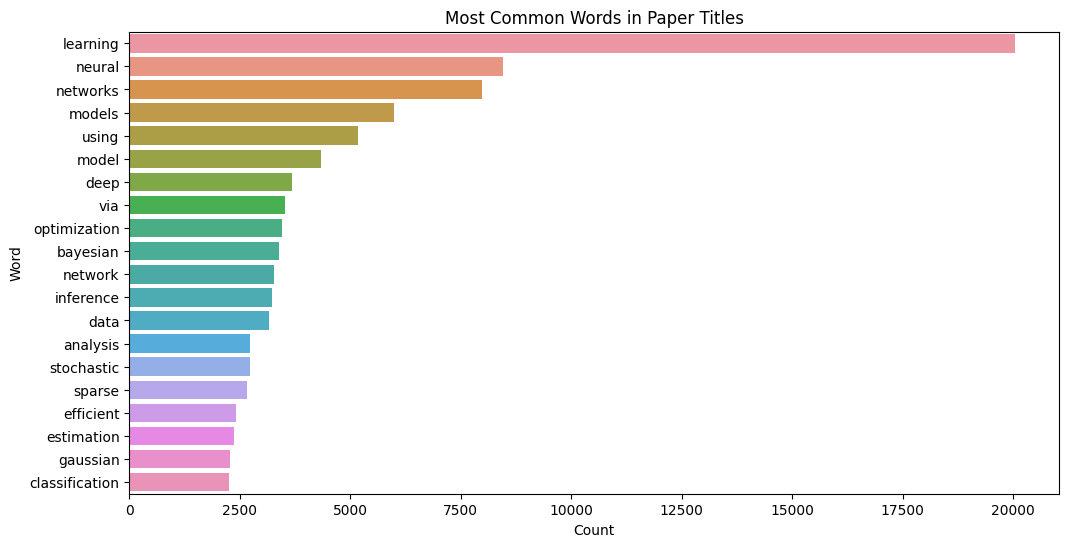

In [6]:
all_titles = ' '.join(merged_df['title'].dropna())

import re
titles_cleaned = re.sub(r'[^\w\s]','', all_titles).lower().split()

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
titles_cleaned = [word for word in titles_cleaned if word not in stop_words]

from collections import Counter
word_counts = Counter(titles_cleaned)
common_words = word_counts.most_common(20)

words_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(x='count', y='word', data=words_df)
plt.title('Most Common Words in Paper Titles')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()
